# Supervised Learning: Classification of Zoo Animals using K-Nearest Neighbors

## Dataset Information

**Dataset Name:** 'Zoo Data Set'
- **Source:** http://archive.ics.uci.edu/ml/datasets/Zoo
- **Description:** This dataset contains 100 different zoo animals and their 17 features.
- Columns:

Column Name|Data Type|Description
--- | --- | ---
animal name | String | name of the animal
hair | Boolean | 0: hairless, 1: has hair
feathers | Boolean | 0: no feathers, 1: has feathers
eggs | Boolean | 0: no eggs, 1: lays eggs
milk | Boolean | 0: no milk, 1: milk
airborne | Boolean | 0: is not airborne, 1: is airborne
aquatic | Boolean | 0: is not aquatic, 1: is aquatic
predator | Boolean | 0: is not a predator, 1: is a predator
toothed | Boolean | 0: no teeth, 1: has teeth
backbone | Boolean | 0: no backbone, 1: has backbone
breathes | Boolean | 0: does not breathe, 1: breathes
venomous | Boolean | 0: is not venomous, 1: is venomous
fins | Boolean | 0: no fins, 1: has fins
legs | Numeric (set of values: {0,2,4,5,6,8}) | number of legs
tail | Boolean | 0: no tail, 1: has tail
domestic | Boolean | 0: not domestic, 1: is domestic
catsize | Boolean | 0: not catsize, 1: catsize
type | Numeric (integer values in range [1,7]) | category of animal it belongs to


- 'type' column

'type' value | Number of Animals in the category | Animals in the category
--- | --- | ---
1 |(41) | aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf
2 | (20) | chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
3 | (5) | pitviper, seasnake, slowworm, tortoise, tuatara
4 | (13) | bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
5 | (4) | frog, frog, newt, toad
6 | (8) | flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
7 | (10) | clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

## Setup
Importing packages and importing the dataset.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import dataset

# dataset does not initially have column names, so add them in
column_names = ['animal name', 'hair', 'feathers', 'eggs', 'milk', 
                'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 
                'breathes', 'venomous', 'fins', 'legs', 'tail',
                'domestic', 'catsize', 'type']
df = pd.read_csv('zoo.csv', names = column_names)

Since there are two animal names titled 'frog', one that is venomous and one that is not, rename the venomous frog to 'frog 2' so that they are distinguishable

In [3]:
df[df['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [4]:
df.at[26, 'animal name'] = 'frog2'

In [5]:
df = df.set_index('animal name')
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Split the Data into Features and Labels
Next, split up the dataset from the labels. In the case of this dataset, we want to classify what 'type' each animal belongs to. So the labels will be the 'type' column and the features will be all the remaining columns.

In [6]:
features = df[['hair', 'feathers', 'eggs', 'milk', 
                'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 
                'breathes', 'venomous', 'fins', 'legs', 'tail',
                'domestic', 'catsize']]
labels = df['type']

### Normalize the data
Use min-max normalization to ensure that no one feature carries more weight than another.

In [7]:
# Function Name: min_max_normalize 
# returns normalized the data in lst
# Parameters: lst - lst of values that need to be normalized
# Return: A normalized lst
def min_max_normalize(lst):
    # find the minimum and maximum of lst
    minimum = min(lst)
    maximum = max(lst)
    # store the new normalized values
    normalized = []
    # loop through all the elements in lst
    for i in range(len(lst)):
        # apply min-max normalization formula to each element
        normalized.append((lst[i] - minimum)/(maximum - minimum))
    return normalized

Since all the columns are of type boolean except for the 'legs' category, we only need to normalize the 'legs' column.

In [8]:
# normalize the data
legs_normalized = min_max_normalize(np.array(features['legs']))
features.loc[:, 'legs'] = np.array(legs_normalized).reshape(-1,1)
features

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,0.50,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0.00,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,0.25,1,0,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,0.75,0,0,0
wolf,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1


### Split the Data into Training Set and Test Set
Split the data into a training set and a test set so we can evaluate the performance of the classifier. Here we will be using 80% of the data for the training set and 20% of the data for the test set.

In [9]:
# import train_test_split to split up data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=1)

In [10]:
# check that the size of the training set is accurate
print(len(X_train))
print(len(y_train))

80
80


## Implement K-Nearest Neighbors

To implement the K-Nearest Neighbors algorithm, first define a helper function, distance, that will find the "distance" between two animals based on the features in the data set.

Then, the predict method calculates all the "distances" between a particular animal and all the other animals in the dataset. It then determines which *k* animals have the closest "distances" or in other words, have the most features in common, to the unknown animal. Based on the closest animals' type categorization, we can predict the unknown animal's type.

In [11]:
# Function Name: distance
# Helper function, calculates the Euclidean distance between animal1 and animal2's features.
# Parameters: animal1 - the first animal
#             animal2 - the second animal
# Return: The Euclidean distance between the features of animal1 and animal2.
def distance(animal1, animal2):
    squared_diff = 0
    # loop through all the features for an animal
    for i in range(len(animal1)):
        # calculate the squared difference
        squared_diff += (animal1[i] - animal2[i]) ** 2
    return squared_diff ** 0.5

# Function Name: predict
# Parameters: unknown  - the animal who's type you want to predict
#             features - the dataset used to predict
#             labels   - the dataset with the all the categorized types for 
#                        the animals in the features dataset
#             k        - the number of neighbors
# Return: The predicted animal category that unknown belongs to
def predict(unknown, features, labels, k):
    distances = []
    # calculate the distance of each animal from unknown animal
    for i in range(len(features)):
        animal = features.iloc[i]
        distance_to_unknown = distance(animal, unknown)
        distances.append([distance_to_unknown, animal.name])
    # sort the animal distances
    distances.sort()
    # choose only the k animals (neighbors)
    neighbors = distances[0:k]
    type_num = [0,0,0,0,0,0,0]
    # find the types of each of the k animals/neighbors
    for neighbor in neighbors:
        name = neighbor[1]
        real_value = labels[name]
        for j in range(7):
            if real_value == j+1:
                type_num[j] += 1
    # return the most common type
    max_type = max(type_num)
    return type_num.index(max_type) + 1

#### Test out the predictor.
Pick an animal that is not in the training set, and predict what type of animal it is.

In [12]:
# see what reindeer is categorized as by the predictor, and set k=5
predict(X_test.loc['reindeer'], X_train, y_train, 5)

1

Let's check to see what category reindeer actually lies in.

In [13]:
y_test.loc['reindeer']

1

As the predict() function returned, reindeer is indeed in the 'Type' 1 category of animals.

## Accuracy of the Classifier

In [14]:
# Function Name: find_accuracy
# Find the accuracy of the classifier
# Parameters: training_set - the dataset used to train
#             training_labels - the labels (y-valuse) used to train
#             test_set        - the dataset that was partitioned away to test
#             test_labels     - the labels (y-values) partitioned away to test
#             k               - the number of neighbors
# Return: the accuracy of the predict() function
def find_accuracy(training_set, training_labels, test_set, test_labels, k):
    num_correct = 0.0
    # loop through each movie in the validation set
    for i in range(len(test_set)):
        animal = test_set.iloc[i]
        # Find how the classifier predicts the movie's label to be
        guess = predict(animal, training_set, training_labels, k)
        # If the classifier is correct, increment num_correct
        if guess == test_labels[animal.name]:
            num_correct += 1
    # Return the number correct over the number tested
    return num_correct/len(test_set)

Test out the accuracy of the predict() method, setting k=5.

In [15]:
find_accuracy(X_train, y_train, X_test, y_test, 1)

1.0

The predictor has ~ 95% accuracy!

In [16]:
# Check if accuracy can be improved by choosing a different k
accuracies = []
scores = []
k_list = range(1,25)
for k in k_list:
    accuracy = find_accuracy(X_train, y_train, X_test, y_test, k)
    accuracies.append([k,accuracy])
    scores.append(accuracy)
max(accuracies, key=lambda x: x[1])

[1, 1.0]

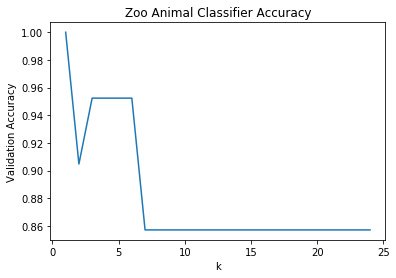

In [17]:
plt.plot(k_list, scores)

plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Zoo Animal Classifier Accuracy')

plt.show()

As you can see, the highest accuarcy occurs when k=1, and is also around 95% accurate when k is around 5.

## How does this comparre to Scikit-Learn?

Now let's see how this compares to the scikit-learn classifier.

Since I already split up the data into training sets and test sets, we will use the same split as before.

In [18]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Create classifier with k = 5
classifier = KNeighborsClassifier(n_neighbors = 5)

In [20]:
# Train the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# Check the accuracy of the classifier
classifier.score(X_train, y_train)

0.95

In [22]:
# Check if accuracy can be improved by choosing a different k
scores = []
accuracies = []
k_list = range(1,25)
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_train, y_train)
    accuracies.append([k,score])
    scores.append(score)
max(accuracies, key=lambda x: x[1])

[1, 1.0]

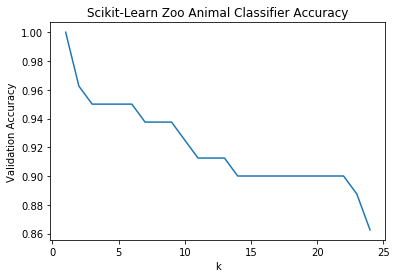

In [23]:
plt.plot(k_list, scores)

plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Scikit-Learn Zoo Animal Classifier Accuracy')

plt.show()

While the scikit-learn classifier has around the same accuracy as the classifier I implemented, the one that I implemented has a much faster decrease in accuracy when k increases.